# **Disaster Tweet Classification using NLP**
---

##  Importing libraries and required modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#libraries for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import HTML
!pip install chart_studio
!pip install cufflinks
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

## Reading and preparation of data

Reading [data](https://www.kaggle.com/c/nlp-getting-started/data) and choosing important columns using [pandas](https://pandas.pydata.org/)

In [3]:
#data = pd.read_csv('train_data_cleaning.csv')
from google.colab import files
uploaded = files.upload()

Saving train_data_cleaning.csv to train_data_cleaning (2).csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train_data_cleaning (2).csv']))

In [5]:
data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1
5,8,NaN,NaN,# Rocky Fire Update = > California Hwy . ...,1
6,10,NaN,NaN,# flood # disaster Heavy rain causes flash f...,1
7,13,NaN,NaN,I am on top of the hill and I can see a fire i...,1
8,14,NaN,NaN,There is an emergency evacuation happening now...,1
9,15,NaN,NaN,I am afraid that the tornado is coming to our ...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
data = data[['text','target']]
data.head()

,text,target
0,Our Deeds are the Reason of this # earthquake...,1
1,Forest fire near La Ronge Sask . Canada,1
2,All residents asked to ' shelter in place ' ...,1
3,"13,000 people receive # wildfires evacuation ...",1
4,Just got sent this photo from Ruby # Alaska a...,1


##  Data Exploration

##  Visualising counts of real and fake tweets

In [8]:
fig = px.bar(x=["0","1"], y=data["target"].value_counts(),color=["red", "goldenrod"])

#Change this value for bar widths
for dt in fig.data:
    dt["width"] = 0.4

fig.update_layout(
    title_text = "Counts for Disaster and Non-Disaster Tweets",
    title_x=0.5,
    width=800,
    height=550,
    xaxis_title="Targets",
    yaxis_title="Count",
    showlegend=False
).show()

# py.plot(fig,filename='Counts for Disaster and Non-Disaster Tweets',auto_open=False,show_link=False)


<div>
    <a href="https://plotly.com/~raklugrin01/1/?share_key=hgjA8Zkl35RjZtywNHe0jm" target="_blank" title="Counts for Disaster and Non-Disaster Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/1.png?share_key=hgjA8Zkl35RjZtywNHe0jm" alt="Counts for Disaster and Non-Disaster Tweets" style="max-width: 100%;width: 1000px;"  width="1000" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:1" sharekey-plotly="hgjA8Zkl35RjZtywNHe0jm" src="https://plotly.com/embed.js" async></script>
</div>

##  Visualising lengths of tweets

In [9]:
from plotly.subplots import make_subplots

word_len_dis = data[data['target']==1]['text'].str.split().map(lambda x : len(x))

word_len_non_dis = data[data['target']==0]['text'].str.split().map(lambda x : len(x))

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
            go.Histogram(x=word_len_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=1
).add_trace(
            go.Histogram(x=word_len_non_dis,marker_line=dict(color='black'),marker_line_width=1.2),
            row=1, col=2
).update_layout(title_text="Length of words in Tweets",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Length of words in Tweets',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/3/?share_key=c65IIAyuBQBfgU1Rfovdfb" target="_blank" title="Length of words in Tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/3.png?share_key=c65IIAyuBQBfgU1Rfovdfb" alt="Length of words in Tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:3" sharekey-plotly="c65IIAyuBQBfgU1Rfovdfb" src="https://plotly.com/embed.js" async></script>
</div>


## Visualising average word lengths of tweets

In [10]:
def avgwordlen(strlist):
    sum=[]
    for i in strlist:
        sum.append(len(i))
    return sum

avgword_len_dis = data[data['target']==1]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

avgword_len_non_dis = data[data['target']==0]['text'].str.split().apply(avgwordlen).map(lambda x: np.mean(x))

group_labels = ['Disaster', 'Non-Disaster']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = ff.create_distplot([avgword_len_dis, avgword_len_non_dis], group_labels, bin_size=.2, colors=colors,)

fig.update_layout(title_text="Average word length in tweets",title_x=0.5,xaxis_title="Text",yaxis_title="Density").show()

# py.plot(fig,filename='Average word length in tweets',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/5/?share_key=tfNQPMyUblqOh7JL1sEiqW" target="_blank" title="Average word length in tweets" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/5.png?share_key=tfNQPMyUblqOh7JL1sEiqW" alt="Average word length in tweets" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:5" sharekey-plotly="tfNQPMyUblqOh7JL1sEiqW" src="https://plotly.com/embed.js" async></script>
</div>


##  Visualising most common stop words in the text data

In [11]:
def create_corpus(target):
    corpus = []
    for i in data[data['target']==target]['text'].str.split():
        for x in i:
            corpus.append(x)
    return corpus

In [12]:
values_list = []

def analyze_stopwords(data,func,targetlist):

  for label in range(0,len(targetlist)):
    corpus = func(targetlist[label])
    dic = defaultdict(int)

    for word in corpus:
        dic[word] += 1

    top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
    x_items,y_values = zip(*top)
    values_list.append(x_items)
    values_list.append(y_values)

#analyzing stopwords for 0 and 1 target labels
analyze_stopwords(data,create_corpus,[0,1])

fig = make_subplots(rows=1, cols=2,subplot_titles=("Disaster Tweets", "Non-Disaster Tweets"))

fig.add_trace(
      go.Bar(x=values_list[1],y=values_list[0],orientation='h',marker=dict(color= 'rgba(152, 255, 74,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=values_list[3],y=values_list[2],orientation='h',marker=dict(color= 'rgba(255, 143, 92,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=2
).update_layout(title_text="Top stop words in the text",title_x=0.5,showlegend=False).show()

# py.plot(fig,filename='Top stop words in the text',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/13/?share_key=icoxxtajqMGbKIizrTLUX0" target="_blank" title="Top stop words in the text" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/13.png?share_key=icoxxtajqMGbKIizrTLUX0" alt="Top stop words in the text" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:13" sharekey-plotly="icoxxtajqMGbKIizrTLUX0" src="https://plotly.com/embed.js" async></script>
</div>

## Data Cleaning

In [13]:
stemmer = SnowballStemmer("english")

def preprocess_data(data):

    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data)

    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)

    #removal of html tags
    text = re.sub(r'<.*?>',' ',text)

    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)

    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text)
    text = re.sub(r"\([^()]*\)", "", text)

    # remove mentions
    text = re.sub('@\S+', '', text)

    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)


    # Lowering all the words in text
    text = text.lower()
    text = text.split()

    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]

    # Removal of words with length<2
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

data["Cleaned_text"] = data["text"].apply(preprocess_data)

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Displaying Cleaned Data

In [15]:
data.head()

,text,target,Cleaned_text
0,Our Deeds are the Reason of this # earthquake...,1,deed reason earthquak may allah forgiv
1,Forest fire near La Ronge Sask . Canada,1,forest fire near rong sask canada
2,All residents asked to ' shelter in place ' ...,1,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive # wildfires evacuation ...",1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby # Alaska a...,1,got sent photo rubi alaska smoke wildfir pour ...


#  Extra Data Exploration and Analysis on Cleaned Text

In [16]:
def wordcloud(data,title):
    words = ' '.join(data['Cleaned_text'].astype('str').tolist())
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords = stopwords,width= 512, height = 512).generate(words)
    plt.figure(figsize=(10,8),frameon=True)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()

data_disaster = data[data['target'] == 1]
data_non_disaster = data[data['target'] == 0]

##  Visualising words inside Real Disaster Tweets

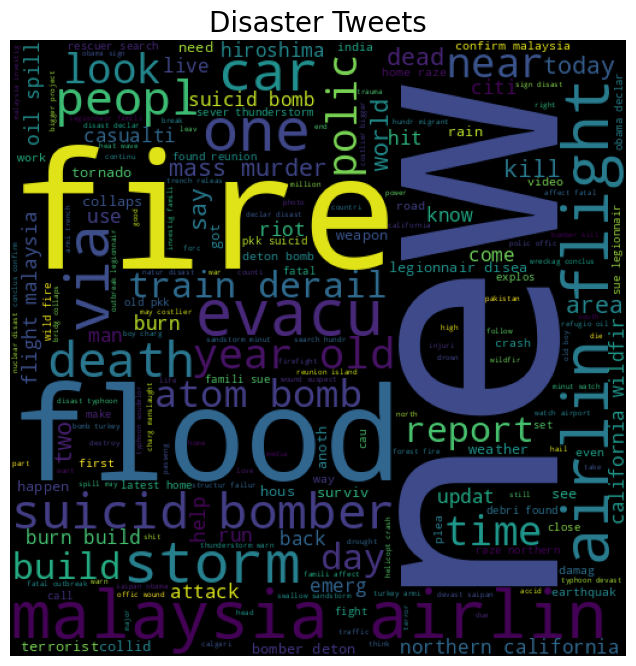

In [17]:
wordcloud(data_disaster,"Disaster Tweets")

##  Visualising words inside Fake Disaster Tweets

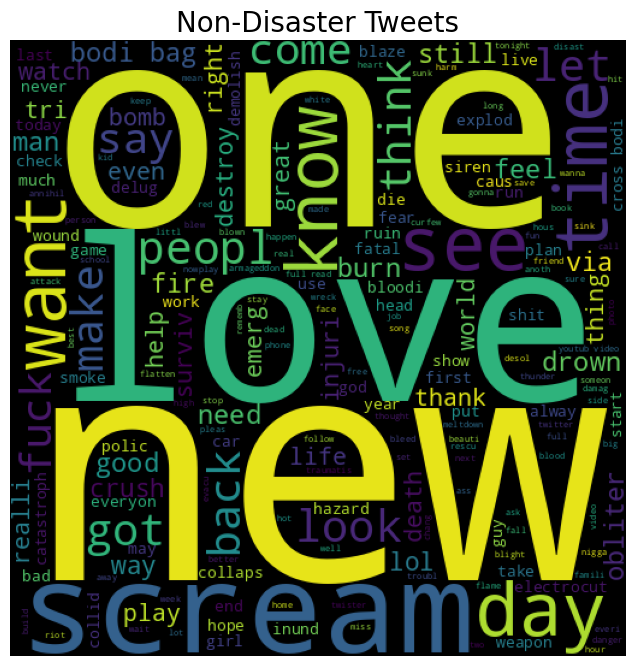

In [18]:
wordcloud(data_non_disaster,"Non-Disaster Tweets")

## Removing unwanted words with high frequency

In [19]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fear','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

data["Cleaned_text"] = data["Cleaned_text"].apply(text_cleaning)

##  Analysing top 10 N-grams where N is 1,2,3

In [20]:
def top_ngrams(data,n,grams):
    count_vec = CountVectorizer(ngram_range=(grams,grams)).fit(data)
    bow = count_vec.transform(data)
    add_words = bow.sum(axis=0)
    word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

Creating data of top 10 n-grams for n = 1, 2, 3

In [21]:
common_uni = top_ngrams(data["Cleaned_text"],10,1)
common_bi = top_ngrams(data["Cleaned_text"],10,2)
common_tri = top_ngrams(data["Cleaned_text"],10,3)
common_uni_df = pd.DataFrame(common_uni,columns=['word','freq'])
common_bi_df = pd.DataFrame(common_bi,columns=['word','freq'])
common_tri_df = pd.DataFrame(common_tri,columns=['word','freq'])

## Visualising top 10 N-grams for N = 1, 2, 3

In [22]:
fig = make_subplots(rows=3, cols=1,subplot_titles=("Top 20 Unigrams in Text", "Top 20 Bigrams in Text","Top 20 Trigrams in Text"))

fig.add_trace(
      go.Bar(x=common_uni_df["word"],y=common_uni_df["freq"],
             marker=dict(color= 'rgba(255, 170, 59,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=1, col=1
).add_trace(
      go.Bar(x=common_bi_df["word"],y=common_bi_df["freq"],
             marker=dict(color= 'rgba(89, 255, 147,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=2, col=1
).add_trace(
      go.Bar(x=common_tri_df["word"],y=common_tri_df["freq"],
             marker=dict(color= 'rgba(89, 153, 255,0.8)'),
             marker_line=dict(color='black'),marker_line_width=1.2),
      row=3, col=1
).update_layout(title_text="Visualization of Top 20 Unigrams, Bigrams and Trigrams",
                title_x=0.5,showlegend=False,width=800,height=1600,).update_xaxes(tickangle=-90).show()

# py.plot(fig,filename='Visualization of Top 20 Unigrams, Bigrams and Trigrams',auto_open=False,show_link=False)

<div>
    <a href="https://plotly.com/~raklugrin01/17/?share_key=rHBUmASeWITErHR7rEdZqJ" target="_blank" title="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="display: block; text-align: center;"><img src="https://plotly.com/~raklugrin01/17.png?share_key=rHBUmASeWITErHR7rEdZqJ" alt="Visualization of Top 20 Unigrams, Bigrams and Trigrams" style="max-width: 100%;width: 1400px;"  width="1400" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="raklugrin01:17" sharekey-plotly="rHBUmASeWITErHR7rEdZqJ" src="https://plotly.com/embed.js" async></script>
</div>


#  Data Preprocessing

In [23]:
X_inp_clean = data['Cleaned_text']
X_inp_original = data['text']
y_inp = data['target']

Using [scikit-learn's train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data into training and validation dataset

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_inp_clean, y_inp, test_size=0.2, random_state=42, stratify=y_inp)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

checking size of data after train test split

In [25]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6090,), (1523,), (6090,), (1523,))

##  Creating function to encode data using BoW

In [26]:
def encoding(train_data,valid_data,bow=False,n=1,tf_idf=False):
    if bow==True:
        cv = CountVectorizer(ngram_range=(n,n))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train,columns=cv.get_feature_names_out())
        cv_df_valid = cv.transform(valid_data).toarray()
        valid_df = pd.DataFrame(cv_df_valid,columns=cv.get_feature_names_out())

    elif tf_idf==True:

        tfidf = TfidfVectorizer(ngram_range=(n, n), use_idf=1,smooth_idf=1,sublinear_tf=1)
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train,columns=tfidf.get_feature_names_out())
        tf_df_valid = tfidf.transform(valid_data).toarray()
        valid_df = pd.DataFrame(tf_df_valid,columns=tfidf.get_feature_names_out())

    return train_df,valid_df

In [27]:
!pip install scikit-learn

## Encoding training and validation data

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

We encode our data in all possible combinations provided by our function

In [29]:
X_train_bow1 , X_valid_bow1 = encoding(X_train,X_valid,bow=True)
X_train_bow2 , X_valid_bow2 = encoding(X_train,X_valid,bow=True,n=2)
X_train_bow3 , X_valid_bow3 = encoding(X_train,X_valid,bow=True,n=3)
X_train_tfidf1 , X_valid_tfidf1 = encoding(X_train,X_valid,bow=True,tf_idf=True)
X_train_tfidf2 , X_valid_tfidf2 = encoding(X_train,X_valid,bow=True,tf_idf=True,n=2)
X_train_tfidf3 , X_valid_tfidf3 = encoding(X_train,X_valid,bow=True,tf_idf=True,n=3)

#  Training and tuning Machine Learining Models

In [30]:
def c_report(y_true,y_pred):
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_scr))
    return acc_scr

def plot_cm(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

## Logistic Regression

In [31]:
model_bow1_logreg = LogisticRegression()
model_bow1_logreg.fit(X_train_bow1,y_train)
pred_bow1_logreg = model_bow1_logreg.predict(X_valid_bow1)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       869
           1       0.82      0.74      0.78       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8174655285620486


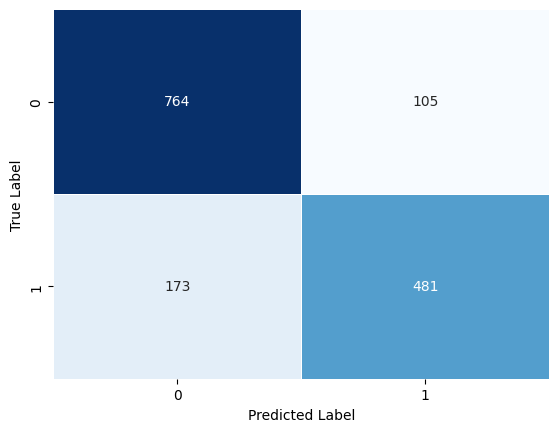

In [32]:
acc_bow1_logreg = c_report(y_valid,pred_bow1_logreg)
plot_cm(y_valid,pred_bow1_logreg)

Now training another Logistic Regression model with n-grams=2 and BoW

In [33]:
model_bow2_logreg = LogisticRegression()
model_bow2_logreg.fit(X_train_bow2,y_train)
pred_bow2_logreg = model_bow2_logreg.predict(X_valid_bow2)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=2) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       869
           1       0.89      0.46      0.61       654

    accuracy                           0.74      1523
   macro avg       0.80      0.71      0.71      1523
weighted avg       0.78      0.74      0.72      1523

Accuracy : 0.7445830597504924


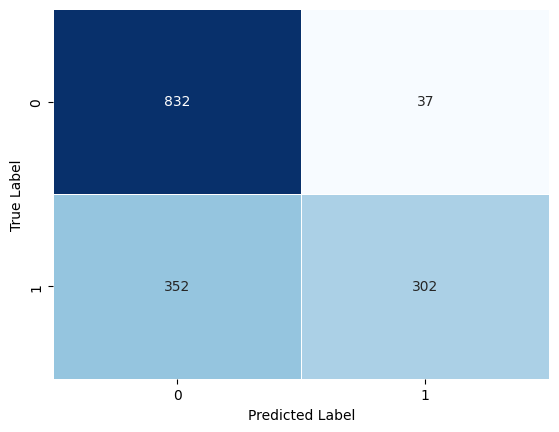

In [34]:
acc_bow2_logreg = c_report(y_valid,pred_bow2_logreg)
plot_cm(y_valid,pred_bow2_logreg)

We can observe that as n is increasing model accuracy is decreasing   
let's try to increase n one last time just to be sure

In [35]:
model_bow3_logreg = LogisticRegression()
model_bow3_logreg.fit(X_train_bow3,y_train)
pred_bow3_logreg = model_bow3_logreg.predict(X_valid_bow3)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(BoW,n-grams=3) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       869
           1       0.92      0.34      0.49       654

    accuracy                           0.70      1523
   macro avg       0.79      0.66      0.64      1523
weighted avg       0.78      0.70      0.66      1523

Accuracy : 0.7038739330269206


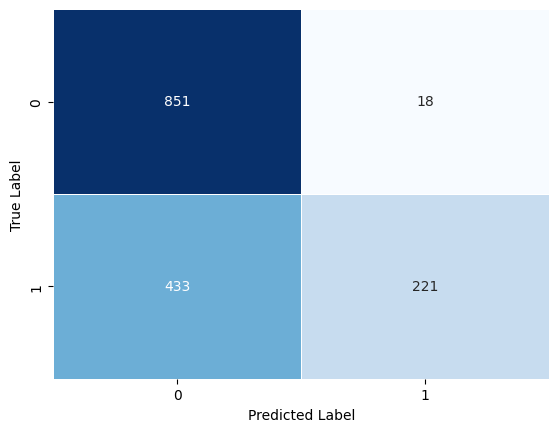

In [36]:
acc_bow3_logreg = c_report(y_valid,pred_bow3_logreg)
plot_cm(y_valid,pred_bow3_logreg)

From the above results it's clear that using n = 1 will always give us more accuray,  
now let's use tfidf approach with n = 1 to train our Logistic Regression model

In [37]:
model_tfidf1_logreg = LogisticRegression(C=1.0)
model_tfidf1_logreg.fit(X_train_tfidf1,y_train)
pred_tfidf1_logreg = model_tfidf1_logreg.predict(X_valid_tfidf1)

LogisticRegression()

Printing classification report and ploting confusion matrix for the predictions made by LogisticRegression(TF-IDF,n-grams=1) model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       869
           1       0.82      0.74      0.78       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523

Accuracy : 0.8174655285620486


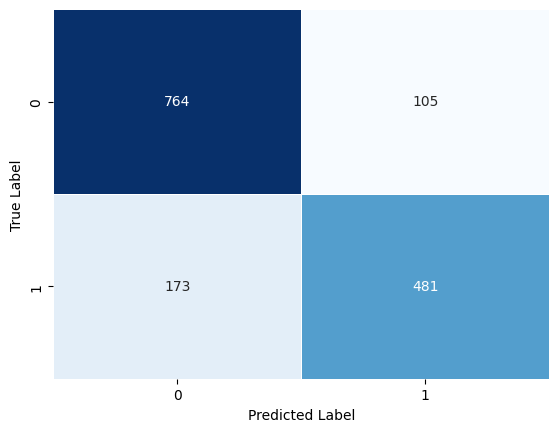

In [38]:
acc_tfidf1_logreg = c_report(y_valid,pred_tfidf1_logreg)
plot_cm(y_valid,pred_tfidf1_logreg)

From Logistic Regression we saw n-grams = 1 gives the best results

##  Random Forest Classifier

In [39]:
model_tfidf1_RFC = RandomForestClassifier()
model_tfidf1_RFC.fit(X_train_tfidf1,y_train)
pred_tfidf1_RFC = model_tfidf1_RFC.predict(X_valid_tfidf1)

RandomForestClassifier()

Printing classification report and ploting confusion matrix for predictions of RandomForestClassifier model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       869
           1       0.80      0.67      0.73       654

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523

Accuracy : 0.7866053841103086


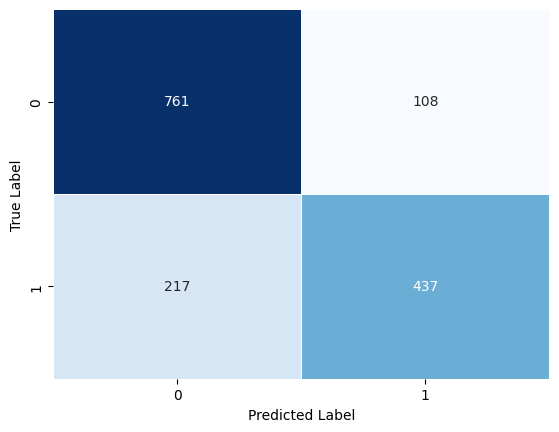

In [40]:
acc_tfidf1_RFC = c_report(y_valid,pred_tfidf1_RFC)
plot_cm(y_valid,pred_tfidf1_RFC)

## Support Vector CLassifier


In [41]:
model_tfidf1_SVC = SVC(kernel='linear', degree=3, gamma='auto')
model_tfidf1_SVC.fit(X_train_tfidf1,y_train)
pred_tfidf1_SVC = model_tfidf1_SVC.predict(X_valid_tfidf1)

SVC(gamma='auto', kernel='linear')

Printing classification report and ploting confusion matrix for the SVC model

Classifictaion Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       869
           1       0.77      0.72      0.75       654

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Accuracy : 0.7872619829284307


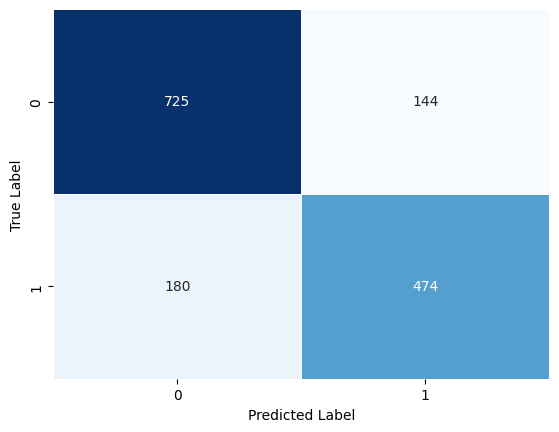

In [42]:
acc_tfidf1_SVC = c_report(y_valid,pred_tfidf1_SVC)
plot_cm(y_valid,pred_tfidf1_SVC)

In [43]:
pip install xgboost

# XGBoost

In [44]:
from xgboost import XGBClassifier

In [45]:
model_tfidf1_XGB = XGBClassifier(eval_metric='mlogloss')
model_tfidf1_XGB.fit(X_train_tfidf1,y_train)
pred_tfidf1_XGB = model_tfidf1_XGB.predict(X_valid_tfidf1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [46]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multi_strategy=None, n_estimators=100, n_jobs=4,
              num_parallel_tree=1, ...)

Classifictaion Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       869
           1       0.83      0.66      0.74       654

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Accuracy : 0.7964543663821405


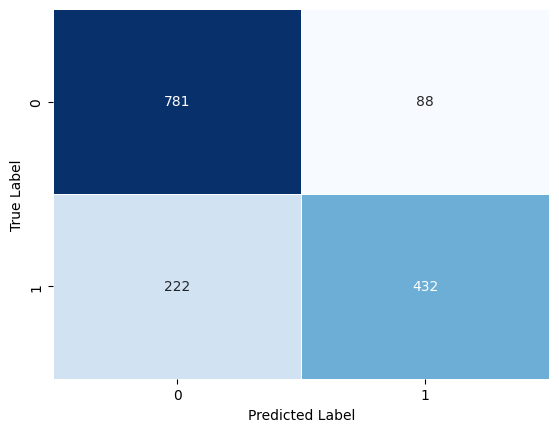

In [47]:
acc_tfidf1_XGB = c_report(y_valid,pred_tfidf1_XGB)
plot_cm(y_valid,pred_tfidf1_XGB)

# RNN + LSTM Model

In [48]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [49]:
max_words = 4000
max_len = 40
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [50]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('tanh')(layer)
    model_lstm = Model(inputs=inputs,outputs=layer)
    return model_lstm

In [51]:
model_lstm = RNN()
model_lstm.summary()
model_lstm.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 40)]              0         
                                                                 
 embedding (Embedding)       (None, 40, 50)            200000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [52]:
model_lstm.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2)

Epoch 1/10
39/39 [==============================] - 6s 92ms/step - loss: 0.8736 - accuracy: 0.5507 - val_loss: 0.8397 - val_accuracy: 0.4261
Epoch 2/10
39/39 [==============================] - 4s 106ms/step - loss: 0.5972 - accuracy: 0.6761 - val_loss: 0.5024 - val_accuracy: 0.7685
Epoch 3/10
39/39 [==============================] - 3s 75ms/step - loss: 0.4277 - accuracy: 0.8149 - val_loss: 0.5140 - val_accuracy: 0.7299
Epoch 4/10
39/39 [==============================] - 3s 77ms/step - loss: 0.3518 - accuracy: 0.8436 - val_loss: 0.4819 - val_accuracy: 0.7726
Epoch 5/10
39/39 [==============================] - 3s 76ms/step - loss: 0.3080 - accuracy: 0.8709 - val_loss: 0.9378 - val_accuracy: 0.8120
Epoch 6/10
39/39 [==============================] - 4s 107ms/step - loss: 0.2856 - accuracy: 0.8896 - val_loss: 0.6562 - val_accuracy: 0.7603
Epoch 7/10
39/39 [==============================] - 3s 76ms/step - loss: 0.2449 - accuracy: 0.8994 - val_loss: 0.9723 - val_accuracy: 0.7537
Epoch 8/10


In [53]:
test_sequences = tok.texts_to_sequences(X_train)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [54]:
accr = model_lstm.evaluate(test_sequences_matrix,y_train)

191/191 [==============================] - 2s 12ms/step - loss: 0.3137 - accuracy: 0.9187


In [55]:
# Evaluate the model
loss, accuracy = model_lstm.evaluate(test_sequences_matrix,y_train)

# Print the accuracy
print('Accuracy:', accuracy)

191/191 [==============================] - 2s 9ms/step - loss: 0.3137 - accuracy: 0.9187
Accuracy: 0.9187192320823669


# LSTM

In [56]:
X = data["text"] # indpendent
y = data["target"] # dependent
y = np.array(y) # converting into array

In [57]:
from tqdm import tqdm
def unique_words(text):
  unique_words_list = []
  for sent in tqdm(text):
    for word in sent.split():
      if word.lower() not in unique_words_list:
        unique_words_list.append(word.lower())
      else:
        pass
  return unique_words_list
un_words = unique_words(X)

100%|██████████| 7613/7613 [00:07<00:00, 1062.25it/s]


In [58]:
print("Total number of unique words :",len(un_words))


Total number of unique words : 16966


In [59]:
un_words[:50]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 '.',
 'canada',
 'residents',
 'asked',
 'to',
 "'",
 'shelter',
 'in',
 'place',
 'being',
 'notified',
 'by',
 'officers',
 'no',
 'other',
 'evacuation',
 'or',
 'orders',
 'expected',
 '13,000',
 'people',
 'receive',
 'wildfires',
 'california',
 'just',
 'got',
 'sent',
 'photo',
 'from',
 'ruby']

In [60]:
data["target"].value_counts(normalize = True)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [61]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [62]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

In [63]:
nltk.download('wordnet')
def preprocessing(text):

  tweets = []
  for tweet in tqdm(text):
    tweet = tweet.lower() # converting to lower case
    tweet =  remove_urls(tweet) # url removing
    tweet = re.sub(r'@\w+',  '', tweet).strip() # removing the words start with "@"
    tweet = re.sub("[^a-zA-Z0-9 ']", "", tweet) # removing unwanted symbols
    tweet = tweet.split()
    tweet1 = [wl.lemmatize(word) for word in tweet if word not in set(stopwords.words("english"))] #lemmatization and stopwrds removal
    tweet1 = " ".join(tweet1)
    tweets.append(tweet1)
  return tweets

tweets = preprocessing(X)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

100%|██████████| 7613/7613 [00:16<00:00, 453.30it/s]


In [64]:
tweets[:50]

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 "resident asked ' shelter place ' notified officer evacuation shelter place order expected",
 '13000 people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rocky fire update california hwy 20 closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'top hill see fire wood',
 'emergency evacuation happening building across street',
 'afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding',
 'raining flooding florida tampabay tampa 18 19 day lost count',
 'flood bago myanmar arrived bago',
 'damage school bus 80 multi car crash breaking',
 'man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love skii

In [65]:
import tensorflow as tf
tf.__version__

from tensorflow.keras.layers import (Embedding,
                                     LSTM,
                                     Dense,
                                     Dropout,
                                     GlobalMaxPool1D,
                                     BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

'2.15.0'

In [66]:
VOC_SIZE = 30000
onehot_repr = [one_hot(words, VOC_SIZE) for words in tweets]
onehot_repr[100:110]

[[11643, 10808, 12794, 7768, 17627, 16330, 15069, 3753, 5512],
 [15200,
  25693,
  12981,
  17979,
  29714,
  15902,
  5428,
  26414,
  15069,
  15412,
  22046,
  26140,
  15212],
 [9206, 9343, 6511, 18195, 5692, 13869],
 [11770, 9761, 6319, 12805, 15630, 24894, 9761, 2607, 11770, 20373, 17],
 [9146,
  3634,
  10712,
  12346,
  1928,
  10712,
  8463,
  26998,
  15402,
  21453,
  21378,
  25108,
  7351],
 [11770, 18143, 29153, 2000, 29605, 11770, 11030, 29045, 27434],
 [9146,
  3634,
  10712,
  12346,
  1928,
  10712,
  8463,
  26998,
  15402,
  21453,
  21378,
  25108,
  7351],
 [11770, 23603, 19382, 28800, 14359, 11770, 19306, 20341],
 [9206,
  28205,
  19705,
  7347,
  3403,
  9343,
  21446,
  15448,
  22227,
  10970,
  6511,
  22920],
 [11770, 29867, 8829, 19062, 8149, 11770, 11485, 14448]]

In [67]:
# finding sentence length for each tweets
word_length = []
for i in onehot_repr:
  word_length.append(len(i))

len(word_length)

7613

In [68]:
word_length[1100:1150]

[4,
 13,
 17,
 14,
 17,
 2,
 13,
 16,
 14,
 4,
 5,
 13,
 12,
 8,
 16,
 16,
 10,
 8,
 7,
 10,
 9,
 9,
 10,
 8,
 15,
 5,
 6,
 10,
 19,
 4,
 4,
 8,
 12,
 7,
 13,
 11,
 13,
 11,
 8,
 14,
 10,
 6,
 7,
 6,
 7,
 7,
 7,
 7,
 22,
 9]

(array([ 433.,  739., 1765., 1341., 2051.,  799.,  387.,   61.,   22.,
          15.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Length of Words')

Text(0, 0.5, 'Nos')

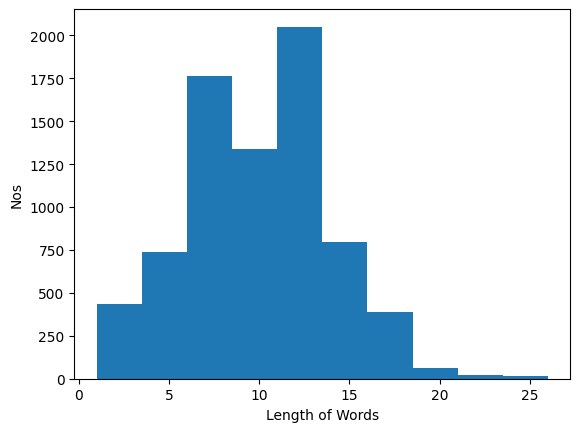

In [69]:
# plotting graph (length of the tweets vs Numbers)
plt.hist(word_length)
plt.xlabel("Length of Words")
plt.ylabel("Nos")
plt.show()

In [70]:
SENT_LENGTH = 15
embedded_docs = pad_sequences(onehot_repr, padding="post", maxlen=SENT_LENGTH)
embedded_docs

array([[10010, 25400,  6605, ...,     0,     0,     0],
       [23186, 24515,  8689, ...,     0,     0,     0],
       [ 3911,  6909, 11770, ..., 15307,     0,     0],
       ...,
       [ 1107, 29609,  5866, ...,     0,     0,     0],
       [ 3444,  8381,  8809, ..., 14147, 14575, 18676],
       [15175,  3259,  1922, ...,     0,     0,     0]], dtype=int32)

In [71]:
def create_model():
  VECT_FEATURES = 32
  model = Sequential()
  model.add(Embedding(VOC_SIZE,
                      VECT_FEATURES,
                      input_length=SENT_LENGTH))
  model.add(LSTM(100, return_sequences = True))
  model.add(GlobalMaxPool1D())
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))
  return model

In [72]:
model = create_model()
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"]) # compiling
model.summary() #summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 32)            960000    
                                                                 
 lstm_1 (LSTM)               (None, 15, 100)           53200     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

In [73]:
history = model.fit(embedded_docs, y, epochs=6, batch_size=32)

Epoch 1/6
238/238 [==============================] - 10s 28ms/step - loss: 0.5535 - accuracy: 0.7211
Epoch 2/6
238/238 [==============================] - 8s 33ms/step - loss: 0.3591 - accuracy: 0.8559
Epoch 3/6
238/238 [==============================] - 7s 30ms/step - loss: 0.2427 - accuracy: 0.9134
Epoch 4/6
238/238 [==============================] - 7s 31ms/step - loss: 0.1786 - accuracy: 0.9376
Epoch 5/6
238/238 [==============================] - 8s 33ms/step - loss: 0.1381 - accuracy: 0.9450
Epoch 6/6
238/238 [==============================] - 7s 29ms/step - loss: 0.1152 - accuracy: 0.9532


Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

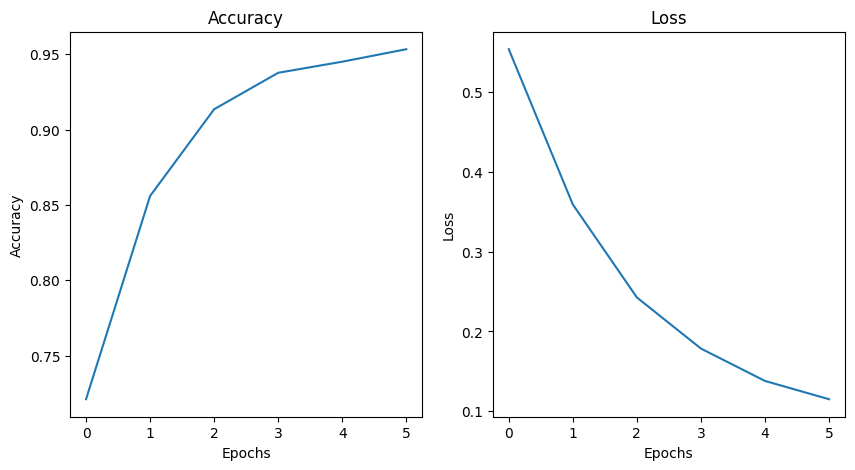

In [74]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(history.history["accuracy"])
ax1.set_title("Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

ax2.plot(history.history["loss"])
ax2.set_title("Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
plt.show()

In [75]:
accr = model.evaluate(embedded_docs, y)

238/238 [==============================] - 2s 6ms/step - loss: 0.0812 - accuracy: 0.9632


In [76]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [77]:
y_pred_keras = model.predict(embedded_docs).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y, y_pred_keras)

238/238 [==============================] - 2s 7ms/step


In [94]:
y_pred_rnn = model_lstm.predict(sequences_matrix).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_train, y_pred_rnn)

191/191 [==============================] - 3s 13ms/step


In [96]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_rnn = auc(fpr_rnn, tpr_rnn)

In [79]:
rf = model_tfidf1_RFC
y_pred_rf = rf.predict_proba(X_valid_tfidf1)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

In [92]:
lg = model_bow1_logreg
y_pred_lg = lg.predict_proba(X_valid_bow1)[:, 1]
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_valid, y_pred_lg)
auc_lg = auc(fpr_lg, tpr_lg)

lg2 = model_bow2_logreg
y_pred_lg2 = lg2.predict_proba(X_valid_bow2)[:, 1]
fpr_lg2, tpr_lg2, thresholds_lg2 = roc_curve(y_valid, y_pred_lg2)
auc_lg2 = auc(fpr_lg2, tpr_lg2)

lg3= model_bow3_logreg
y_pred_lg3 = lg3.predict_proba(X_valid_bow3)[:, 1]
fpr_lg3, tpr_lg3, thresholds_lg3 = roc_curve(y_valid, y_pred_lg3)
auc_lg3 = auc(fpr_lg3, tpr_lg3)

In [89]:
svc = model_tfidf1_SVC
fpr1, tpr1, thresholds = roc_curve(y_valid, pred_tfidf1_SVC, pos_label=1)
auc_svc = auc(fpr1,tpr1)

In [84]:
xgb = model_tfidf1_XGB
y_pred_xgb = xgb.predict_proba(X_valid_tfidf1)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_valid, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

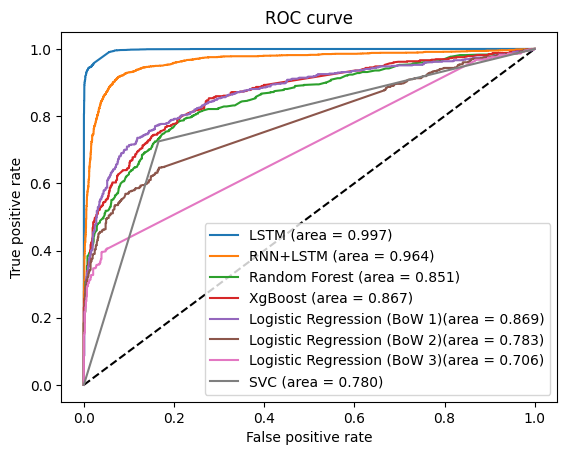

In [100]:
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='LSTM (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rnn, tpr_rnn, label='RNN+LSTM (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XgBoost (area = {:.3f})'.format(auc_xgb))
plt.plot(fpr_lg, tpr_lg, label='Logistic Regression (BoW 1)(area = {:.3f})'.format(auc_lg))
plt.plot(fpr_lg2, tpr_lg2, label='Logistic Regression (BoW 2)(area = {:.3f})'.format(auc_lg2))
plt.plot(fpr_lg3, tpr_lg3, label='Logistic Regression (BoW 3)(area = {:.3f})'.format(auc_lg3))
plt.plot(fpr1, tpr1, label='SVC (area = {:.3f})'.format(auc_svc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
